<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Variance-threshold" data-toc-modified-id="Variance-threshold-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Variance threshold</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Step-Forward-Feature-Selection" data-toc-modified-id="Step-Forward-Feature-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step Forward Feature Selection</a></span></li></ul></div>

In [1]:
# Import needed libraries
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline
sns.set()

# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_pickle('data/listings_cleaned_processed.pkl')

model = GradientBoostingRegressor(n_estimators=50, n_iter_no_change=10)

In [2]:
df.head()

,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,requires_license,instant_bookable,reviews_per_month,security_deposit_required,Internet,Wireless,Kitchen,Free parking,Air conditioning,TV,Pets,Heating,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Plane,property_type_Serviced apartment,property_type_Tent,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,price_log
0,25.0,False,1.0,True,False,10,7.0,5.0,5.0,3000.0,200.0,1,0.0,1,1125,27,352,0,96.0,False,True,1.13,1.0,True,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,8.006368
1,100.0,True,1.0,True,False,2,1.0,1.0,1.0,50.0,55.0,1,0.0,1,1125,29,350,33,93.0,False,False,1.91,0.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,3.912023
2,100.0,True,1.0,True,True,2,1.0,1.0,1.0,55.0,55.0,1,10.0,1,1125,18,348,14,100.0,False,False,1.72,0.0,True,True,True,True,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,4.007333
3,100.0,True,1.0,True,False,6,1.0,1.0,3.0,150.0,35.0,1,0.0,1,2,3,87,22,100.0,False,True,2.12,0.0,True,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,5.010635
4,100.0,False,1.0,True,True,1,1.0,1.0,1.0,30.0,5.0,1,10.0,1,90,0,0,3,93.0,False,False,0.18,0.0,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,3.401197


In [3]:
df.shape

(30854, 79)

In [4]:
X = df.drop(columns=['price', 'price_log'], axis=1)
y = df.price_log

In [5]:
def model_eval(X, y):
    model.fit(X, y)
    predict = model.predict(X)
    r2 = r2_score(y, predict)

    return r2


# Variance threshold

In [6]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, thresh=0.10):
    selector = VarianceThreshold(threshold=thresh)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

<Figure size 432x288 with 0 Axes>

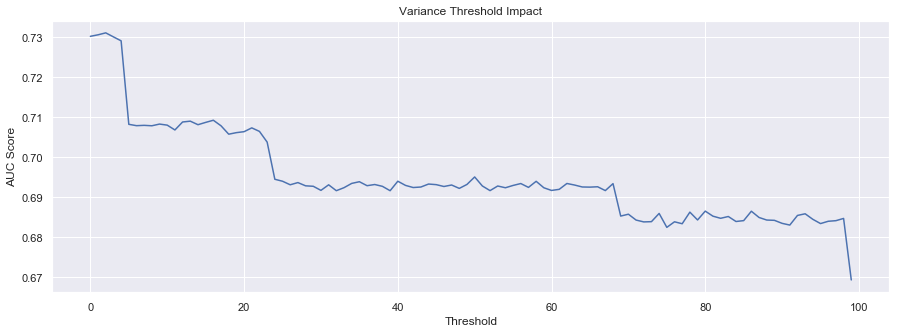

<Figure size 432x288 with 0 Axes>

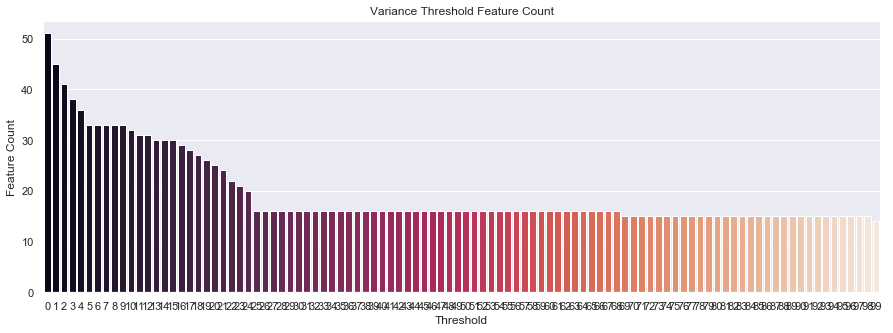

In [7]:
results = []
features = []
threshhold_num = list(range(0, 100, 1))
for i in threshhold_num:
    t = i/100
    new = variance_threshold_selector(X, thresh=t)
    features.append(new.shape[1])
    r2 = model_eval(new, y)
    results.append(r2)

plt.figure()
f, axes = plt.subplots(figsize=(15, 5))
plt.title('Variance Threshold Impact')
plt.xlabel("Threshold")
plt.ylabel("AUC Score")
sns.lineplot(y=results, x=threshhold_num)
plt.show()

plt.figure()
f, axes = plt.subplots(figsize=(15, 5))
plt.title('Variance Threshold Feature Count')
plt.xlabel("Threshold")
plt.ylabel("Feature Count")
sns.barplot(y=features, x=threshhold_num, palette="rocket")
plt.show()

# Correlation

In [8]:
# Set the threshold
threshold = 0.8

corrs = X.corr()

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [9]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))
print(cols_to_remove)

Number of columns to remove:  1
['Wireless']


In [10]:
# Code to remove the selected columns
df = df.drop(columns = cols_to_remove)

X = df.drop(columns=['price', 'price_log'], axis=1)
y = df.price_log

# Feature Importance

In [11]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

In [12]:
model.fit(X, y)

feature_importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': list(
    X.columns), 'importance': feature_importances}).sort_values('importance', ascending=False)

feature_importances.head()

,feature,importance
7,bedrooms,0.393306
9,cleaning_fee,0.140612
5,accommodates,0.128619
6,bathrooms,0.111755
67,room_type_Shared room,0.071092


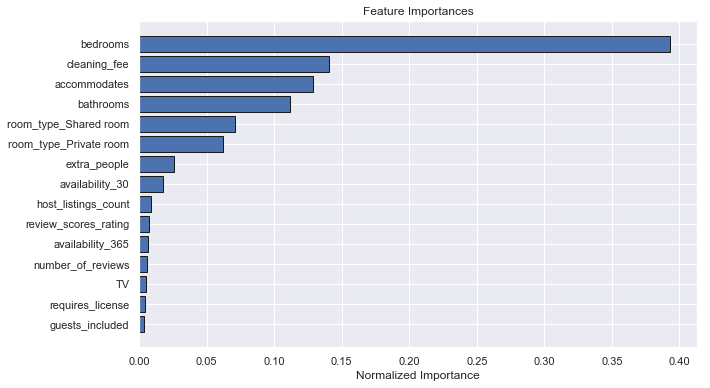

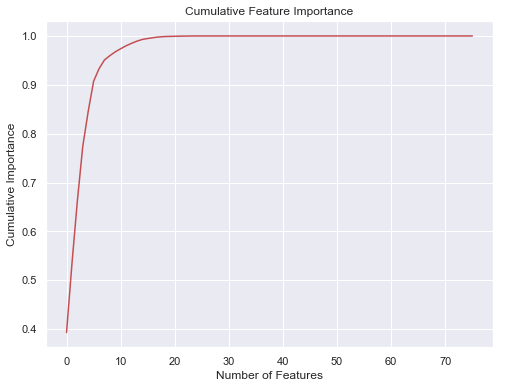

6 features required for 0.90 of cumulative importance


In [13]:
features = plot_feature_importances(feature_importances)

# Step Forward Feature Selection

In [14]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Build step forward feature selection
sfs1 = sfs(model,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   10.1s finished

[2019-05-23 18:31:34] Features: 1/10 -- score: 0.45595503600967985[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   32.6s finished

[2019-05-23 18:32:06] Features: 2/10 -- score: 0.5806004402484523[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:   47.6s finished

[2019-05-23 18:32:54] Features: 3/10 -- score: 0.6115445432192155[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [15]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[2, 5, 6, 7, 9, 11, 14, 17, 66, 67]


In [16]:
cols = list(sfs1.k_feature_names_)

df_final = df[cols].join(y)

In [17]:
df_final.head()

,host_listings_count,accommodates,bathrooms,bedrooms,cleaning_fee,extra_people,availability_30,review_scores_rating,room_type_Private room,room_type_Shared room,price_log
0,1.0,10,7.0,5.0,200.0,0.0,27,96.0,False,False,8.006368
1,1.0,2,1.0,1.0,55.0,0.0,29,93.0,True,False,3.912023
2,1.0,2,1.0,1.0,55.0,10.0,18,100.0,True,False,4.007333
3,1.0,6,1.0,1.0,35.0,0.0,3,100.0,False,False,5.010635
4,1.0,1,1.0,1.0,5.0,10.0,0,93.0,True,False,3.401197


In [18]:
df_final.to_pickle('data/listings_cleaned_processed_stepForward.pkl')